In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import random

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/bprovanbessell/SATfeatPy/main/features_csv/all_features.csv?token=GHSAT0AAAAAABQU4OMZVNM7UJFEOOGDAT6CYQ7SWFA')
df

,c,v,clauses_vars_ratio,vars_clauses_ratio,vcg_var_mean,vcg_var_coeff,vcg_var_min,vcg_var_max,vcg_var_entropy,vcg_clause_mean,vcg_clause_coeff,vcg_clause_min,vcg_clause_max,vcg_clause_entropy,vg_mean,vg_coeff,vg_min,vg_max,pnc_ratio_mean,pnc_ratio_coeff,pnc_ratio_min,pnc_ratio_max,pnc_ratio_entropy,pnv_ratio_mean,pnv_ratio_coeff,pnv_ratio_min,pnv_ratio_max,pnv_ratio_entropy,pnv_ratio_stdev,binary_ratio,ternary_ratio,ternary+,hc_fraction,hc_var_mean,hc_var_coeff,hc_var_min,hc_var_max,hc_var_entropy,unit_props_at_depth_1,unit_props_at_depth_4,...,band_weights_val_rate,exo_node_min,exo_node_max,exo_node_mode,exo_node_mean,exo_node_std,exo_node_zeros,exo_node_entropy,exo_node_q1,exo_node_q2,exo_node_q3,exo_node_val_rate,exo_weights_min,exo_weights_max,exo_weights_mode,exo_weights_mean,exo_weights_std,exo_weights_zeros,exo_weights_entropy,exo_weights_q1,exo_weights_q2,exo_weights_q3,exo_weights_val_rate,rwh_0_mean,rwh_0_coeff,rwh_0_min,rwh_0_max,rwh_1_mean,rwh_1_coeff,rwh_1_min,rwh_1_max,rwh_2_mean,rwh_2_coeff,rwh_2_min,rwh_2_max,file_name,satzilla_base_t,satzilla_probe_t,ansotegui_t,alfonso_t
0,608,71,8.563380,0.116776,0.045172,0.173688,0.029605,0.060855,2.802758,0.045172,0.807882,0.028169,0.169014,0.900080,0.040400,0.173361,0.026316,0.054276,0.945945,0.122943,0.500000,1.0,0.881598,0.168685,1.037697,0.000000,0.600000,3.040421,0.175043,0.799342,0.000000,0.799342,0.799342,0.022517,0.188572,0.013158,0.032895,2.268332,0.000000,0.000000,...,1.000000,0,11,0,1.563380,3.672250,0,3.086135,0.0,0.0,0.0,0.845070,1,1,1,1.0,0.0,0,9.665357,1.0,1.0,1.0,1.0,2593817.5,0.957829,109385.0,5078250.0,1056.695041,1.000000,2.981935e-09,2113.390083,1081.900778,1.000000,1.302080e-29,2163.801556,/projects/satdb/dataset_final/sat_matching_80_...,0.021469,3.190207,0.155923,73.221281
1,615,70,8.785714,0.113821,0.049617,0.168633,0.032520,0.069919,2.607264,0.049617,0.864724,0.028571,0.185714,1.009937,0.044274,0.179832,0.029268,0.065041,0.940273,0.125103,0.500000,1.0,1.009937,0.063636,0.698232,0.000000,0.217391,2.514514,0.044433,0.772358,0.000000,0.772358,0.772358,0.022067,0.193981,0.013008,0.032520,2.300678,0.000000,0.000000,...,1.000000,0,0,0,0.000000,0.000000,0,NaN,0.0,0.0,0.0,1.000000,0,0,0,0.0,0.0,0,NaN,0.0,0.0,0.0,1.0,2735475.5,0.999424,1575.0,5469376.0,1207.488426,1.000000,6.927306e-28,2414.976852,1186.623627,1.000000,3.491123e-120,2373.247255,/projects/satdb/dataset_final/sat_matching_80_...,0.026595,3.461776,0.186650,71.619842
2,926,105,8.819048,0.113391,0.033385,0.186444,0.017279,0.047516,3.022879,0.033385,0.862139,0.019048,0.123810,1.035865,0.030423,0.195192,0.015119,0.045356,0.941985,0.122481,0.333333,1.0,1.035865,0.051989,0.861744,0.000000,0.185185,2.403486,0.044801,0.773218,0.001080,0.774298,0.773218,0.014728,0.215652,0.006479,0.022678,2.446603,0.000000,0.000000,...,0.500000,0,0,0,0.000000,0.000000,0,NaN,0.0,0.0,0.0,1.000000,0,0,0,0.0,0.0,0,NaN,0.0,0.0,0.0,1.0,2148522.5,0.999991,20.0,4297025.0,441.327046,1.000000,1.194627e-76,882.654092,474.697562,1.000000,0.000000e+00,949.395124,/projects/satdb/dataset_final/sat_matching_120...,0.036297,3.868897,0.390993,193.343842
3,603,70,8.614286,0.116086,0.049799,0.133441,0.033167,0.063018,2.688342,0.049799,0.821970,0.028571,0.171429,0.985933,0.044302,0.146098,0.029851,0.059701,0.940687,0.121373,0.500000,1.0,0.985933,0.051673,0.688295,0.000000,0.120000,2.171712,0.035566,0.767828,0.000000,0.767828,0.767828,0.021938,0.172462,0.013267,0.031509,2.151035,0.000000,0.000000,...,1.000000,0,0,0,0.000000,0.000000,0,NaN,0.0,0.0,0.0,1.000000,0,0,0,0.0,0.0,0,NaN,0.0,0.0,0.0,1.0,3320858.0,0.999679,1065.0,6640651.0,1181.583331,1.000000,2.437278e-30,2363.166661,1149.059132,1.000000,4.670090e-147,2298.118264,/projects/satdb/dataset_final/sat_matching_80_...,0.025883,3.470889,0.178437,71.508800
4,228,43,5.302326,0.188596,0.067319,0.162581,0.048246,0.087719,2.203308,0.067319,0.498869,0.046512,0.209302,1.182737,0.056100,0.174052,0.039474,0.074561,0.794319,0.413663,0.000000,1.0,1.187327,0.221325,0.691155,0.000000,0.500000,2.919126,0

In [ ]:
satzilla_base = ['c', 'v', 'clauses_vars_ratio', 'vars_clauses_ratio', 'vcg_var_mean', 'vcg_var_coeff', 'vcg_var_min',
                'vcg_var_max', 'vcg_var_entropy', 'vcg_clause_mean', 'vcg_clause_coeff', 'vcg_clause_min', 'vcg_clause_max',
                'vcg_clause_entropy', 'vg_mean', 'vg_coeff', 'vg_min', 'vg_max', 'pnc_ratio_mean', 'pnc_ratio_coeff',
                'pnc_ratio_min', 'pnc_ratio_max', 'pnc_ratio_entropy', 'pnv_ratio_mean', 'pnv_ratio_coeff', 'pnv_ratio_min',
                'pnv_ratio_max', 'pnv_ratio_entropy', 'pnv_ratio_stdev', 'binary_ratio', 'ternary_ratio', 'ternary+',
                'hc_fraction', 'hc_var_mean', 'hc_var_coeff', 'hc_var_min', 'hc_var_max', 'hc_var_entropy']
satzilla_probing = ['unit_props_at_depth_1', 'unit_props_at_depth_4', 'unit_props_at_depth_16', 'unit_props_at_depth_64',
                    'unit_props_at_depth_256', 'mean_depth_to_contradiction_over_vars', 'estimate_log_number_nodes_over_vars',
                    'saps_BestSolution_Mean', 'saps_BestSolution_CoeffVariance', 'saps_FirstLocalMinStep_Mean',
                    'saps_FirstLocalMinStep_CoeffVariance', 'saps_FirstLocalMinStep_Median', 'saps_FirstLocalMinStep_Q.10',
                    'saps_FirstLocalMinStep_Q.90', 'saps_BestAvgImprovement_Mean', 'saps_BestAvgImprovement_CoeffVariance',
                    'saps_FirstLocalMinRatio_Mean', 'saps_FirstLocalMinRatio_CoeffVariance', 'saps_EstACL_Mean',
                    'gsat_BestSolution_Mean', 'gsat_BestSolution_CoeffVariance', 'gsat_FirstLocalMinStep_Mean',
                    'gsat_FirstLocalMinStep_CoeffVariance', 'gsat_FirstLocalMinStep_Median', 'gsat_FirstLocalMinStep_Q.10',
                    'gsat_FirstLocalMinStep_Q.90', 'gsat_BestAvgImprovement_Mean', 'gsat_BestAvgImprovement_CoeffVariance',
                    'gsat_FirstLocalMinRatio_Mean', 'gsat_FirstLocalMinRatio_CoeffVariance', 'gsat_EstACL_Mean']
ansotegui = ['vig_modularty',
             'vig_d_poly', 'cvig_db_poly', 'variable_alpha']
alfonso = ['v_nd_p_node_min', 'v_nd_p_node_max', 'v_nd_p_node_mode',
           'v_nd_p_node_mean', 'v_nd_p_node_std', 'v_nd_p_node_zeros', 'v_nd_p_node_entropy', 'v_nd_p_node_q1',
           'v_nd_p_node_q2', 'v_nd_p_node_q3', 'v_nd_p_node_val_rate', 'v_nd_p_weights_min', 'v_nd_p_weights_max',
           'v_nd_p_weights_mode', 'v_nd_p_weights_mean', 'v_nd_p_weights_std', 'v_nd_p_weights_zeros',
           'v_nd_p_weights_entropy', 'v_nd_p_weights_q1', 'v_nd_p_weights_q2', 'v_nd_p_weights_q3', 'v_nd_p_weights_val_rate',
           'v_nd_n_node_min', 'v_nd_n_node_max', 'v_nd_n_node_mode', 'v_nd_n_node_mean', 'v_nd_n_node_std',
           'v_nd_n_node_zeros', 'v_nd_n_node_entropy', 'v_nd_n_node_q1', 'v_nd_n_node_q2', 'v_nd_n_node_q3',
           'v_nd_n_node_val_rate', 'v_nd_n_weights_min', 'v_nd_n_weights_max', 'v_nd_n_weights_mode', 'v_nd_n_weights_mean',
           'v_nd_n_weights_std', 'v_nd_n_weights_zeros', 'v_nd_n_weights_entropy', 'v_nd_n_weights_q1', 'v_nd_n_weights_q2',
           'v_nd_n_weights_q3', 'v_nd_n_weights_val_rate', 'c_nd_p_node_min', 'c_nd_p_node_max', 'c_nd_p_node_mode',
           'c_nd_p_node_mean', 'c_nd_p_node_std', 'c_nd_p_node_zeros', 'c_nd_p_node_entropy', 'c_nd_p_node_q1',
           'c_nd_p_node_q2', 'c_nd_p_node_q3', 'c_nd_p_node_val_rate', 'c_nd_p_weights_min', 'c_nd_p_weights_max',
           'c_nd_p_weights_mode', 'c_nd_p_weights_mean', 'c_nd_p_weights_std', 'c_nd_p_weights_zeros',
           'c_nd_p_weights_entropy', 'c_nd_p_weights_q1', 'c_nd_p_weights_q2', 'c_nd_p_weights_q3', 'c_nd_p_weights_val_rate',
           'c_nd_n_node_min', 'c_nd_n_node_max', 'c_nd_n_node_mode', 'c_nd_n_node_mean', 'c_nd_n_node_std',
           'c_nd_n_node_zeros', 'c_nd_n_node_entropy', 'c_nd_n_node_q1', 'c_nd_n_node_q2', 'c_nd_n_node_q3',
           'c_nd_n_node_val_rate', 'c_nd_n_weights_min', 'c_nd_n_weights_max', 'c_nd_n_weights_mode', 'c_nd_n_weights_mean',
           'c_nd_n_weights_std', 'c_nd_n_weights_zeros', 'c_nd_n_weights_entropy', 'c_nd_n_weights_q1', 'c_nd_n_weights_q2',
           'c_nd_n_weights_q3', 'c_nd_n_weights_val_rate', 'vg_al_node_min', 'vg_al_node_max', 'vg_al_node_mode',
           'vg_al_node_mean', 'vg_al_node_std', 'vg_al_node_zeros', 'vg_al_node_entropy', 'vg_al_node_q1', 'vg_al_node_q2',
           'vg_al_node_q3', 'vg_al_node_val_rate', 'vg_al_weights_min', 'vg_al_weights_max', 'vg_al_weights_mode',
           'vg_al_weights_mean', 'vg_al_weights_std', 'vg_al_weights_zeros', 'vg_al_weights_entropy', 'vg_al_weights_q1',
           'vg_al_weights_q2', 'vg_al_weights_q3', 'vg_al_weights_val_rate', 'cg_al_node_min', 'cg_al_node_max',
           'cg_al_node_mode', 'cg_al_node_mean', 'cg_al_node_std', 'cg_al_node_zeros', 'cg_al_node_entropy', 'cg_al_node_q1',
           'cg_al_node_q2', 'cg_al_node_q3', 'cg_al_node_val_rate', 'cg_al_weights_min', 'cg_al_weights_max',
           'cg_al_weights_mode', 'cg_al_weights_mean', 'cg_al_weights_std', 'cg_al_weights_zeros', 'cg_al_weights_entropy',
           'cg_al_weights_q1', 'cg_al_weights_q2', 'cg_al_weights_q3', 'cg_al_weights_val_rate', 'rg_node_min', 'rg_node_max',
           'rg_node_mode', 'rg_node_mean', 'rg_node_std', 'rg_node_zeros', 'rg_node_entropy', 'rg_node_q1', 'rg_node_q2',
           'rg_node_q3', 'rg_node_val_rate', 'rg_weights_min', 'rg_weights_max', 'rg_weights_mode', 'rg_weights_mean',
           'rg_weights_std', 'rg_weights_zeros', 'rg_weights_entropy', 'rg_weights_q1', 'rg_weights_q2', 'rg_weights_q3',
           'rg_weights_val_rate', 'big_node_min', 'big_node_max', 'big_node_mode', 'big_node_mean', 'big_node_std',
           'big_node_zeros', 'big_node_entropy', 'big_node_q1', 'big_node_q2', 'big_node_q3', 'big_node_val_rate',
           'big_weights_min', 'big_weights_max', 'big_weights_mode', 'big_weights_mean', 'big_weights_std',
           'big_weights_zeros', 'big_weights_entropy', 'big_weights_q1', 'big_weights_q2', 'big_weights_q3',
           'big_weights_val_rate', 'and_node_min', 'and_node_max', 'and_node_mode', 'and_node_mean', 'and_node_std',
           'and_node_zeros', 'and_node_entropy', 'and_node_q1', 'and_node_q2', 'and_node_q3', 'and_node_val_rate',
           'and_weights_min', 'and_weights_max', 'and_weights_mode', 'and_weights_mean', 'and_weights_std',
           'and_weights_zeros', 'and_weights_entropy', 'and_weights_q1', 'and_weights_q2', 'and_weights_q3',
           'and_weights_val_rate', 'band_node_min', 'band_node_max', 'band_node_mode', 'band_node_mean', 'band_node_std',
           'band_node_zeros', 'band_node_entropy', 'band_node_q1', 'band_node_q2', 'band_node_q3', 'band_node_val_rate',
           'band_weights_min', 'band_weights_max', 'band_weights_mode', 'band_weights_mean', 'band_weights_std',
           'band_weights_zeros', 'band_weights_entropy', 'band_weights_q1', 'band_weights_q2', 'band_weights_q3',
           'band_weights_val_rate', 'exo_node_min', 'exo_node_max', 'exo_node_mode', 'exo_node_mean', 'exo_node_std',
           'exo_node_zeros', 'exo_node_entropy', 'exo_node_q1', 'exo_node_q2', 'exo_node_q3', 'exo_node_val_rate',
           'exo_weights_min', 'exo_weights_max', 'exo_weights_mode', 'exo_weights_mean', 'exo_weights_std',
           'exo_weights_zeros', 'exo_weights_entropy', 'exo_weights_q1', 'exo_weights_q2', 'exo_weights_q3',
           'exo_weights_val_rate', 'rwh_0_mean', 'rwh_0_coeff', 'rwh_0_min', 'rwh_0_max', 'rwh_1_mean', 'rwh_1_coeff',
           'rwh_1_min', 'rwh_1_max', 'rwh_2_mean', 'rwh_2_coeff', 'rwh_2_min', 'rwh_2_max']

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)
df = df.reset_index(drop=True)

In [ ]:
y_sat = []

for path in df['file_name']:
    name = path.split('/')[-1]
    if name[0] == 's':
        y_sat.append(0)
    elif name[0] == 'u':
        y_sat.append(1)

for i in random.sample(range(0,2000), 10):
    print(df['file_name'][i],y_sat[i])

/projects/satdb/dataset_final/unsat_cliquecoloring_31_155.cnf 1
/projects/satdb/dataset_final/unsat_4color_80_380_64167.cnf 1
/projects/satdb/dataset_final/unsat_php_108_584_8740.cnf 1
/projects/satdb/dataset_final/sat_cliquecoloring_60_334.cnf 0
/projects/satdb/dataset_final/sat_5clique_50_930_13183.cnf 0
/projects/satdb/dataset_final/sat_subsetcard_32_512_22665.cnf 0
/projects/satdb/dataset_final/sat_op_45_249_34879.cnf 0
/projects/satdb/dataset_final/unsat_op_90_775_4041.cnf 1
/projects/satdb/dataset_final/sat_php_228_942_14835.cnf 0
/projects/satdb/dataset_final/sat_op_45_249_39645.cnf 0


In [ ]:
y_category = []

dictionary = {
    'cliquecoloring' : 0,
    'kclique' : 1,
    'kcolor' : 2,
    'tseitin' : 3,
    'php' : 4,
    'matching' : 5,
    'tiling' : 6,
    'subsetcard' : 7,
    'op' : 8,
    'dominating' : 9
}

for path in df['file_name']:
    name = path.split('/')[-1]
    cat = name.split('_')[1]
    if ('color' in cat) and (cat != 'cliquecoloring'):
        cat = 'kcolor'
    elif ('clique' in cat) and (cat != 'cliquecoloring'):
        cat = 'kclique'
    y_category.append(dictionary[cat])

for i in random.sample(range(0,2000), 10):
    print(df['file_name'][i],y_category[i])

/projects/satdb/dataset_final/unsat_tseitin_20_128_23758.cnf 3
/projects/satdb/dataset_final/sat_4color_200_950_65940.cnf 2
/projects/satdb/dataset_final/unsat_dominating_80_1810_98166.cnf 9
/projects/satdb/dataset_final/sat_matching_60_239_57260.cnf 5
/projects/satdb/dataset_final/unsat_cliquecoloring_48_493.cnf 0
/projects/satdb/dataset_final/sat_tseitin_30_664_34926.cnf 3
/projects/satdb/dataset_final/sat_tseitin_30_424_15326.cnf 3
/projects/satdb/dataset_final/sat_matching_160_1293_32692.cnf 5
/projects/satdb/dataset_final/sat_php_223_911_34900.cnf 4
/projects/satdb/dataset_final/sat_subsetcard_48_456_22665.cnf 7


In [ ]:
def calculate_accuracy_rnd_forest(df, y1):

    X = df  # Features
    y = y1 # Target variable
    scaler = MinMaxScaler()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    clf = RandomForestClassifier(n_estimators=10)

    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    score = metrics.accuracy_score(y_test, y_pred)
    return clf, score

In [ ]:
def calculate_accuracy_xgboost(df, y1):

    X = df  # Features
    y = y1 # Target variable
    scaler = MinMaxScaler()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    xgb_clf = XGBClassifier(verbosity = 0)

    clf = xgb_clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    score = metrics.accuracy_score(y_test, y_pred)
    return clf, score

In [ ]:
satzilla = satzilla_base + satzilla_probing
all = satzilla_base + satzilla_probing + ansotegui + alfonso

features_list = [satzilla_base, satzilla, ansotegui, alfonso, all]
name_features = ['satzilla_base', 'full_satzilla', 'antonsegui', 'alfonso', 'all']

print("RANDOM FOREST: ")
for i,features in enumerate(features_list):
    clf, accuracy_sat = calculate_accuracy_rnd_forest(df[features], y_sat)
    clf, accuracy_cat = calculate_accuracy_rnd_forest(df[features], y_category)
    print("SAT/UNSAT Accuracy for " + name_features[i] + ": ",accuracy_sat)
    print("Category Accuracy for " + name_features[i] + ": ",accuracy_cat)

RANDOM FOREST: 
SAT/UNSAT Accuracy for satzilla_base:  0.9019337016574586
Category Accuracy for satzilla_base:  0.9930939226519337
SAT/UNSAT Accuracy for full_satzilla:  0.9958563535911602
Category Accuracy for full_satzilla:  0.9917127071823204
SAT/UNSAT Accuracy for antonsegui:  0.8494475138121547
Category Accuracy for antonsegui:  0.9295580110497238
SAT/UNSAT Accuracy for alfonso:  0.9088397790055248
Category Accuracy for alfonso:  0.9958563535911602
SAT/UNSAT Accuracy for all:  0.994475138121547
Category Accuracy for all:  0.9958563535911602


# K - Fold Cross-validation

In [ ]:
def k_cross_validation(n_splits, n_repeats, algorithm, df, y1):

    X = df
    y = y1
    scaler = MinMaxScaler()
    pipeline = Pipeline([('transformer', scaler), ('estimator', algorithm)])
    cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
    # np.save('scores_10fold_satzilla_full_test.npy', scores)
    mean = np.mean(scores)
    std = np.std(scores)
    return scores, mean, std

In [ ]:
clf = RandomForestClassifier(n_estimators=10)
xgb_clf = XGBClassifier(verbose=0)


print("RANDOM FOREST: ")
for i,features in enumerate(features_list):
    scores_sat, mean_sat, std_sat = k_cross_validation(10, 10, clf, df[features], y_sat)
    scores_cat, mean_cat, std_cat = k_cross_validation(10, 10, clf, df[features], y_category)
    print('SAT/UNSAT Accuracy ' + name_features[i] + ' : %.4f (%.4f)' % (mean_sat, std_sat))
    print('Category Accuracy ' + name_features[i] + ' : %.4f (%.4f)' % (mean_cat, std_cat))


print("XGBOOST: ")
for i,features in enumerate(features_list):
    scores_sat, mean_sat, std_sat = k_cross_validation(10, 10, xgb_clf, df[features], y_sat)
    scores_cat, mean_cat, std_cat = k_cross_validation(10, 10, xgb_clf, df[features], y_category)
    print('SAT/UNSAT Accuracy ' + name_features[i] + ' : %.4f (%.4f)' % (mean_sat, std_sat))
    print('Category Accuracy ' + name_features[i] + ' : %.4f (%.4f)' % (mean_cat, std_cat))

RANDOM FOREST: 


KeyboardInterrupt: ignored

# Features Importance Plot

In [ ]:
def features_importance(df, y1, features, name_features, plttype):

    X = df  # Features
    y = y1 # Target variable
    scaler = MinMaxScaler()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    clf = RandomForestClassifier(n_estimators=10000)

    clf = clf.fit(X_train,y_train)

    importances = clf.feature_importances_
    # Sort feature importances in descending order
    indices = np.argsort(importances)
    # Rearrange feature names so they match the sorted feature importances
    names = [features[i] for i in indices]

    feat_importances = pd.Series(importances, index=names)
    x = feat_importances.nlargest(10).sort_values(ascending=True)
    print(x)

    # Barplot: Add bars
    plt.figure(figsize=(10,5))
    plt.barh(range(x.shape[0]), x)
    # Add feature names as x-axis labels
    plt.yticks(range(x.shape[0]), x.keys(), rotation=0, fontsize = 15)
    # Create plot title
    plt.title("feature importance for " + plttype + " classification - "+str(name_features))
    # Show plot
    plt.show()

cg_al_weights_q1        0.007926
band_node_min           0.008884
v_nd_p_weights_min      0.010685
exo_weights_val_rate    0.011794
v_nd_n_weights_min      0.039397
rg_node_zeros           0.087907
c_nd_p_weights_q1       0.093525
c_nd_p_weights_q2       0.095891
band_weights_zeros      0.102070
c_nd_n_weights_mode     0.109161
dtype: float64


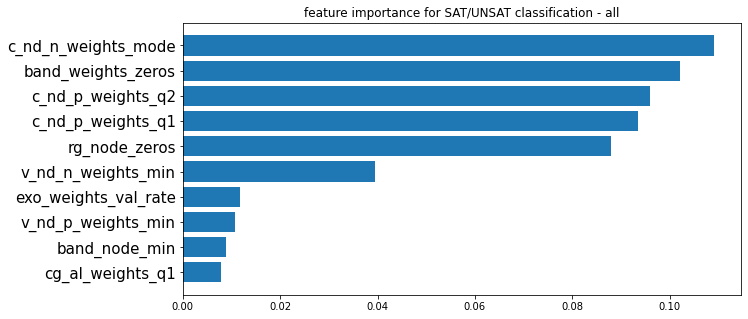

In [ ]:
for i,features in enumerate(features_list):
    if i == 4:
        
        features_importance(df[features],y_sat, features, name_features[i], 'SAT/UNSAT')

pnv_ratio_coeff       0.034944
vg_max                0.036334
vcg_clause_entropy    0.038778
pnv_ratio_mean        0.042379
vars_clauses_ratio    0.042806
vcg_clause_mean       0.045092
pnc_ratio_coeff       0.049390
ternary_ratio         0.055979
hc_var_coeff          0.056231
vcg_var_coeff         0.060949
dtype: float64


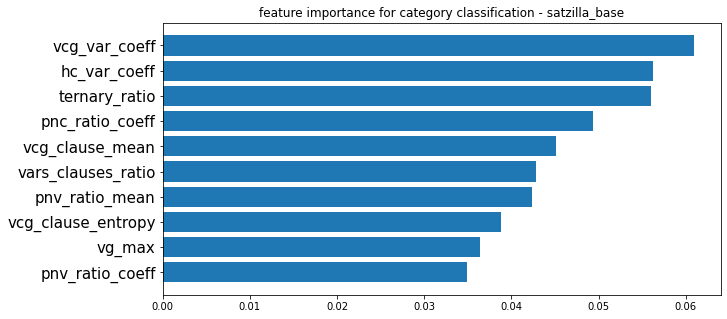

pnc_ratio_min                          0.029815
pnc_ratio_entropy                      0.030863
pnv_ratio_coeff                        0.030897
gsat_FirstLocalMinStep_Q.10            0.031138
saps_BestAvgImprovement_Mean           0.032355
hc_var_coeff                           0.034778
estimate_log_number_nodes_over_vars    0.040430
saps_FirstLocalMinRatio_Mean           0.045312
vcg_clause_min                         0.045718
saps_FirstLocalMinStep_Q.10            0.048169
dtype: float64


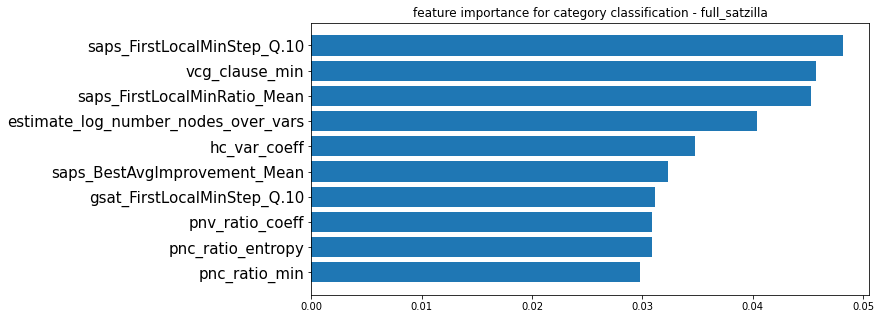

vig_d_poly        0.160029
vig_modularty     0.179280
variable_alpha    0.293174
cvig_db_poly      0.367517
dtype: float64


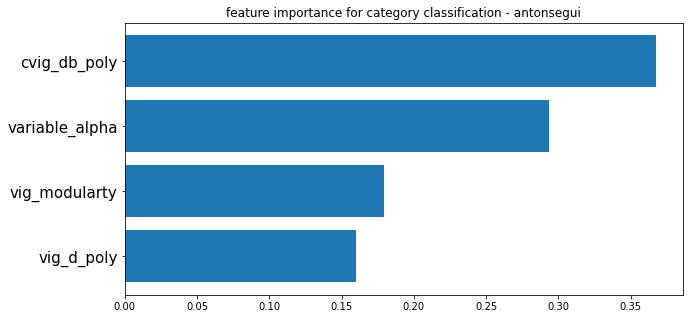

exo_node_val_rate     0.015671
v_nd_n_node_zeros     0.018369
big_node_entropy      0.018638
and_weights_q3        0.018661
cg_al_node_min        0.020262
rg_weights_q1         0.021196
vg_al_weights_mean    0.021392
cg_al_weights_min     0.022130
c_nd_p_node_mode      0.022197
v_nd_n_node_min       0.023266
dtype: float64


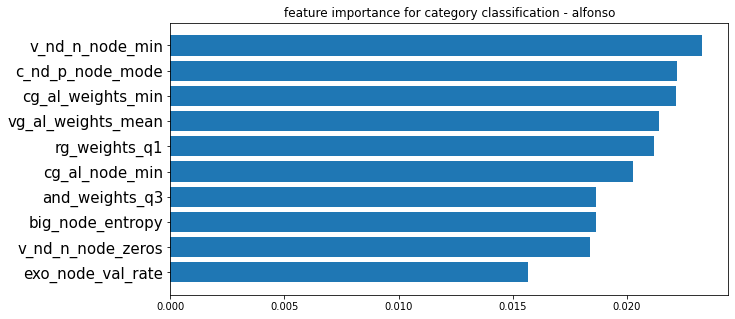

vg_al_node_val_rate                     0.015905
band_node_max                           0.015955
cg_al_weights_q1                        0.016759
v_nd_p_weights_zeros                    0.017048
v_nd_p_weights_q3                       0.017960
big_node_val_rate                       0.018086
rg_node_val_rate                        0.018356
band_node_q2                            0.019611
exo_node_min                            0.020326
saps_FirstLocalMinStep_CoeffVariance    0.020979
dtype: float64


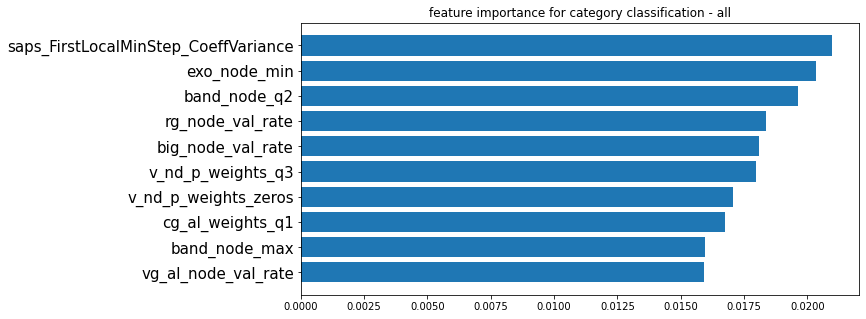

In [ ]:
for i,features in enumerate(features_list):
    features_importance(df[features],y_category, features, name_features[i],  'category')

# Feature Computation Time Graph

In [ ]:
df_rand = pd.read_csv('https://raw.githubusercontent.com/bprovanbessell/SATfeatPy/main/features_csv/rand_features.csv?token=GHSAT0AAAAAABQU4OMYHW6IZXQ7CI5VELQAYRAUJEQ')
df_rand

,c,v,clauses_vars_ratio,vars_clauses_ratio,vcg_var_mean,vcg_var_coeff,vcg_var_min,vcg_var_max,vcg_var_entropy,vcg_clause_mean,vcg_clause_coeff,vcg_clause_min,vcg_clause_max,vcg_clause_entropy,vg_mean,vg_coeff,vg_min,vg_max,pnc_ratio_mean,pnc_ratio_coeff,pnc_ratio_min,pnc_ratio_max,pnc_ratio_entropy,pnv_ratio_mean,pnv_ratio_coeff,pnv_ratio_min,pnv_ratio_max,pnv_ratio_entropy,pnv_ratio_stdev,binary_ratio,ternary_ratio,ternary+,hc_fraction,hc_var_mean,hc_var_coeff,hc_var_min,hc_var_max,hc_var_entropy,unit_props_at_depth_1,unit_props_at_depth_4,...,band_weights_val_rate,exo_node_min,exo_node_max,exo_node_mode,exo_node_mean,exo_node_std,exo_node_zeros,exo_node_entropy,exo_node_q1,exo_node_q2,exo_node_q3,exo_node_val_rate,exo_weights_min,exo_weights_max,exo_weights_mode,exo_weights_mean,exo_weights_std,exo_weights_zeros,exo_weights_entropy,exo_weights_q1,exo_weights_q2,exo_weights_q3,exo_weights_val_rate,rwh_0_mean,rwh_0_coeff,rwh_0_min,rwh_0_max,rwh_1_mean,rwh_1_coeff,rwh_1_min,rwh_1_max,rwh_2_mean,rwh_2_coeff,rwh_2_min,rwh_2_max,file_name,satzilla_base_t,satzilla_probe_t,ansotegui_t,alfonso_t
0,793,185,4.286486,0.233291,0.016468,0.288842,0.005044,0.032787,2.690539,0.016468,0.076675,0.016216,0.027027,0.188410,0.031110,0.275063,0.010088,0.058008,0.497226,0.592617,0.000000,1.0,0.736236,0.232747,0.767942,0.0,1.000000,3.184050,0.178736,0.0,0.958386,0.958386,0.476671,0.007784,0.416085,0.000000,0.017654,2.276873,0.0,0.000000,...,0.500228,0,0,0,0.0,0.0,0,NaN,0.0,0.0,0.0,1.0,0,0,0,0.0,0.0,0,NaN,0,0,0,1.0,546875.0,0.142857,468750.0,625000.0,0.000465,0.050944,0.000441,0.000488,0.000544,0.033993,0.000526,0.000563,/projects/satdb/random/sat_rand3cnf_190_798_17...,0.025876,4.240341,0.513821,58.661260
1,917,213,4.305164,0.232279,0.014300,0.295745,0.004362,0.028353,2.686188,0.014300,0.068637,0.014085,0.018779,0.185962,0.027247,0.285396,0.008724,0.054526,0.495456,0.584898,0.000000,1.0,0.734097,0.241432,0.724854,0.0,1.000000,3.233121,0.175003,0.0,0.954198,0.954198,0.483097,0.006850,0.400047,0.001091,0.017448,2.277607,0.0,0.000000,...,0.500392,0,0,0,0.0,0.0,0,NaN,0.0,0.0,0.0,1.0,0,0,0,0.0,0.0,0,NaN,0,0,0,1.0,359375.0,0.130435,312500.0,406250.0,0.000440,0.243067,0.000333,0.000547,0.000376,0.347549,0.000245,0.000506,/projects/satdb/random/sat_rand3cnf_220_924_62...,0.028931,4.694620,0.673316,82.687405
2,251,59,4.254237,0.235060,0.051185,0.207581,0.027888,0.079681,2.257345,0.051185,0.046268,0.050847,0.067797,0.097729,0.083328,0.193721,0.047809,0.123506,0.503320,0.579566,0.000000,1.0,0.636596,0.195152,0.725774,0.0,0.555556,2.901079,0.141636,0.0,0.980080,0.980080,0.486056,0.024715,0.345842,0.007968,0.043825,2.084204,0.0,0.000000,...,0.503765,0,0,0,0.0,0.0,0,NaN,0.0,0.0,0.0,1.0,0,0,0,0.0,0.0,0,NaN,0,0,0,1.0,390625.0,0.000000,390625.0,390625.0,0.067620,0.176201,0.055705,0.079535,0.044741,0.219838,0.034906,0.054577,/projects/satdb/random/unsat_rand3cnf_60_252_3...,0.012261,2.638673,0.095777,4.711840
3,294,70,4.200000,0.238095,0.042857,0.271768,0.020408,0.071429,2.491447,0.042857,0.000000,0.042857,0.042857,0.000000,0.072886,0.241016,0.034014,0.115646,0.492063,0.577050,0.333333,1.0,0.548874,0.262174,0.839495,0.0,1.000000,3.108827,0.220094,0.0,1.000000,1.000000,0.459184,0.019679,0.455320,0.000000,0.040816,2.300119,0.0,0.014286,...,0.502451,0,0,0,0.0,0.0,0,NaN,0.0,0.0,0.0,1.0,0,0,0,0.0,0.0,0,NaN,0,0,0,1.0,390625.0,0.200000,312500.0,468750.0,0.050174,0.219196,0.039176,0.061172,0.024011,0.271696,0.017488,0.030535,/projects/satdb/random/sat_rand3cnf_70_294_626...,0.014526,2.813540,0.142467,7.244964
4,210,50,4.200000,0.238095,0.060000,0.233285,0.028571,0.080952,2.315103,0.060000,0.000000,0.060000,0.060000,0.000000,0.096381,0.207406,0.052381,0.138095,0.501587,0.577339,0.333333,1.0,0.564936,0.205558,0.749279,0.0,0.666667,2.700981,0.154021,0.0,1.000000,1.000000,0.485714,0.029143,0.326209,0.004762,0.047619,1.896824,0.0,0.000000,...,0.501757,0,0,0,0.0,0.0,0,NaN,0.0,0.0,0.0,1.0,0,0,0,0.0,0.0,0,NaN,0,0,0,1.0,585937.5,0.333333,390625.0,781250.0,0.075778,0.219941,0.059111,0

In [ ]:
cnf_size = []

for path in df_rand['file_name']:
    name = path.split('/')[-1]
    tokens = name.split('_')
    size = int(tokens[2])
    cnf_size.append(size)

for i in random.sample(range(0,100), 10):
    print(df_rand['file_name'][i],cnf_size[i])

/projects/satdb/random/sat_rand3cnf_240_1008_62681.cnf 240
/projects/satdb/random/unsat_rand3cnf_230_966_31942.cnf 230
/projects/satdb/random/sat_rand3cnf_290_1218_62681.cnf 290
/projects/satdb/random/sat_rand3cnf_80_336_17079.cnf 80
/projects/satdb/random/unsat_rand3cnf_150_630_86361.cnf 150
/projects/satdb/random/sat_rand3cnf_270_1134_79628.cnf 270
/projects/satdb/random/sat_rand3cnf_40_168_39063.cnf 40
/projects/satdb/random/sat_rand3cnf_280_1176_86361.cnf 280
/projects/satdb/random/unsat_rand3cnf_130_546_718.cnf 130
/projects/satdb/random/sat_rand3cnf_120_504_49089.cnf 120


In [ ]:
def get_mean_std(X,Y):
    Z = [x for _,x in sorted(zip(Y,X), key=lambda pair : pair[0])]
    Z = np.reshape(Z, (29,10))
    Y.sort()
    Y = np.reshape(Y, (29,10))

    x = []
    y = []
    std = []
    for i in range(29):
        x.append(Y[i][0])
        y.append(np.mean(Z[i]))
        std.append(np.std(Z[i]))

    return x,y,std

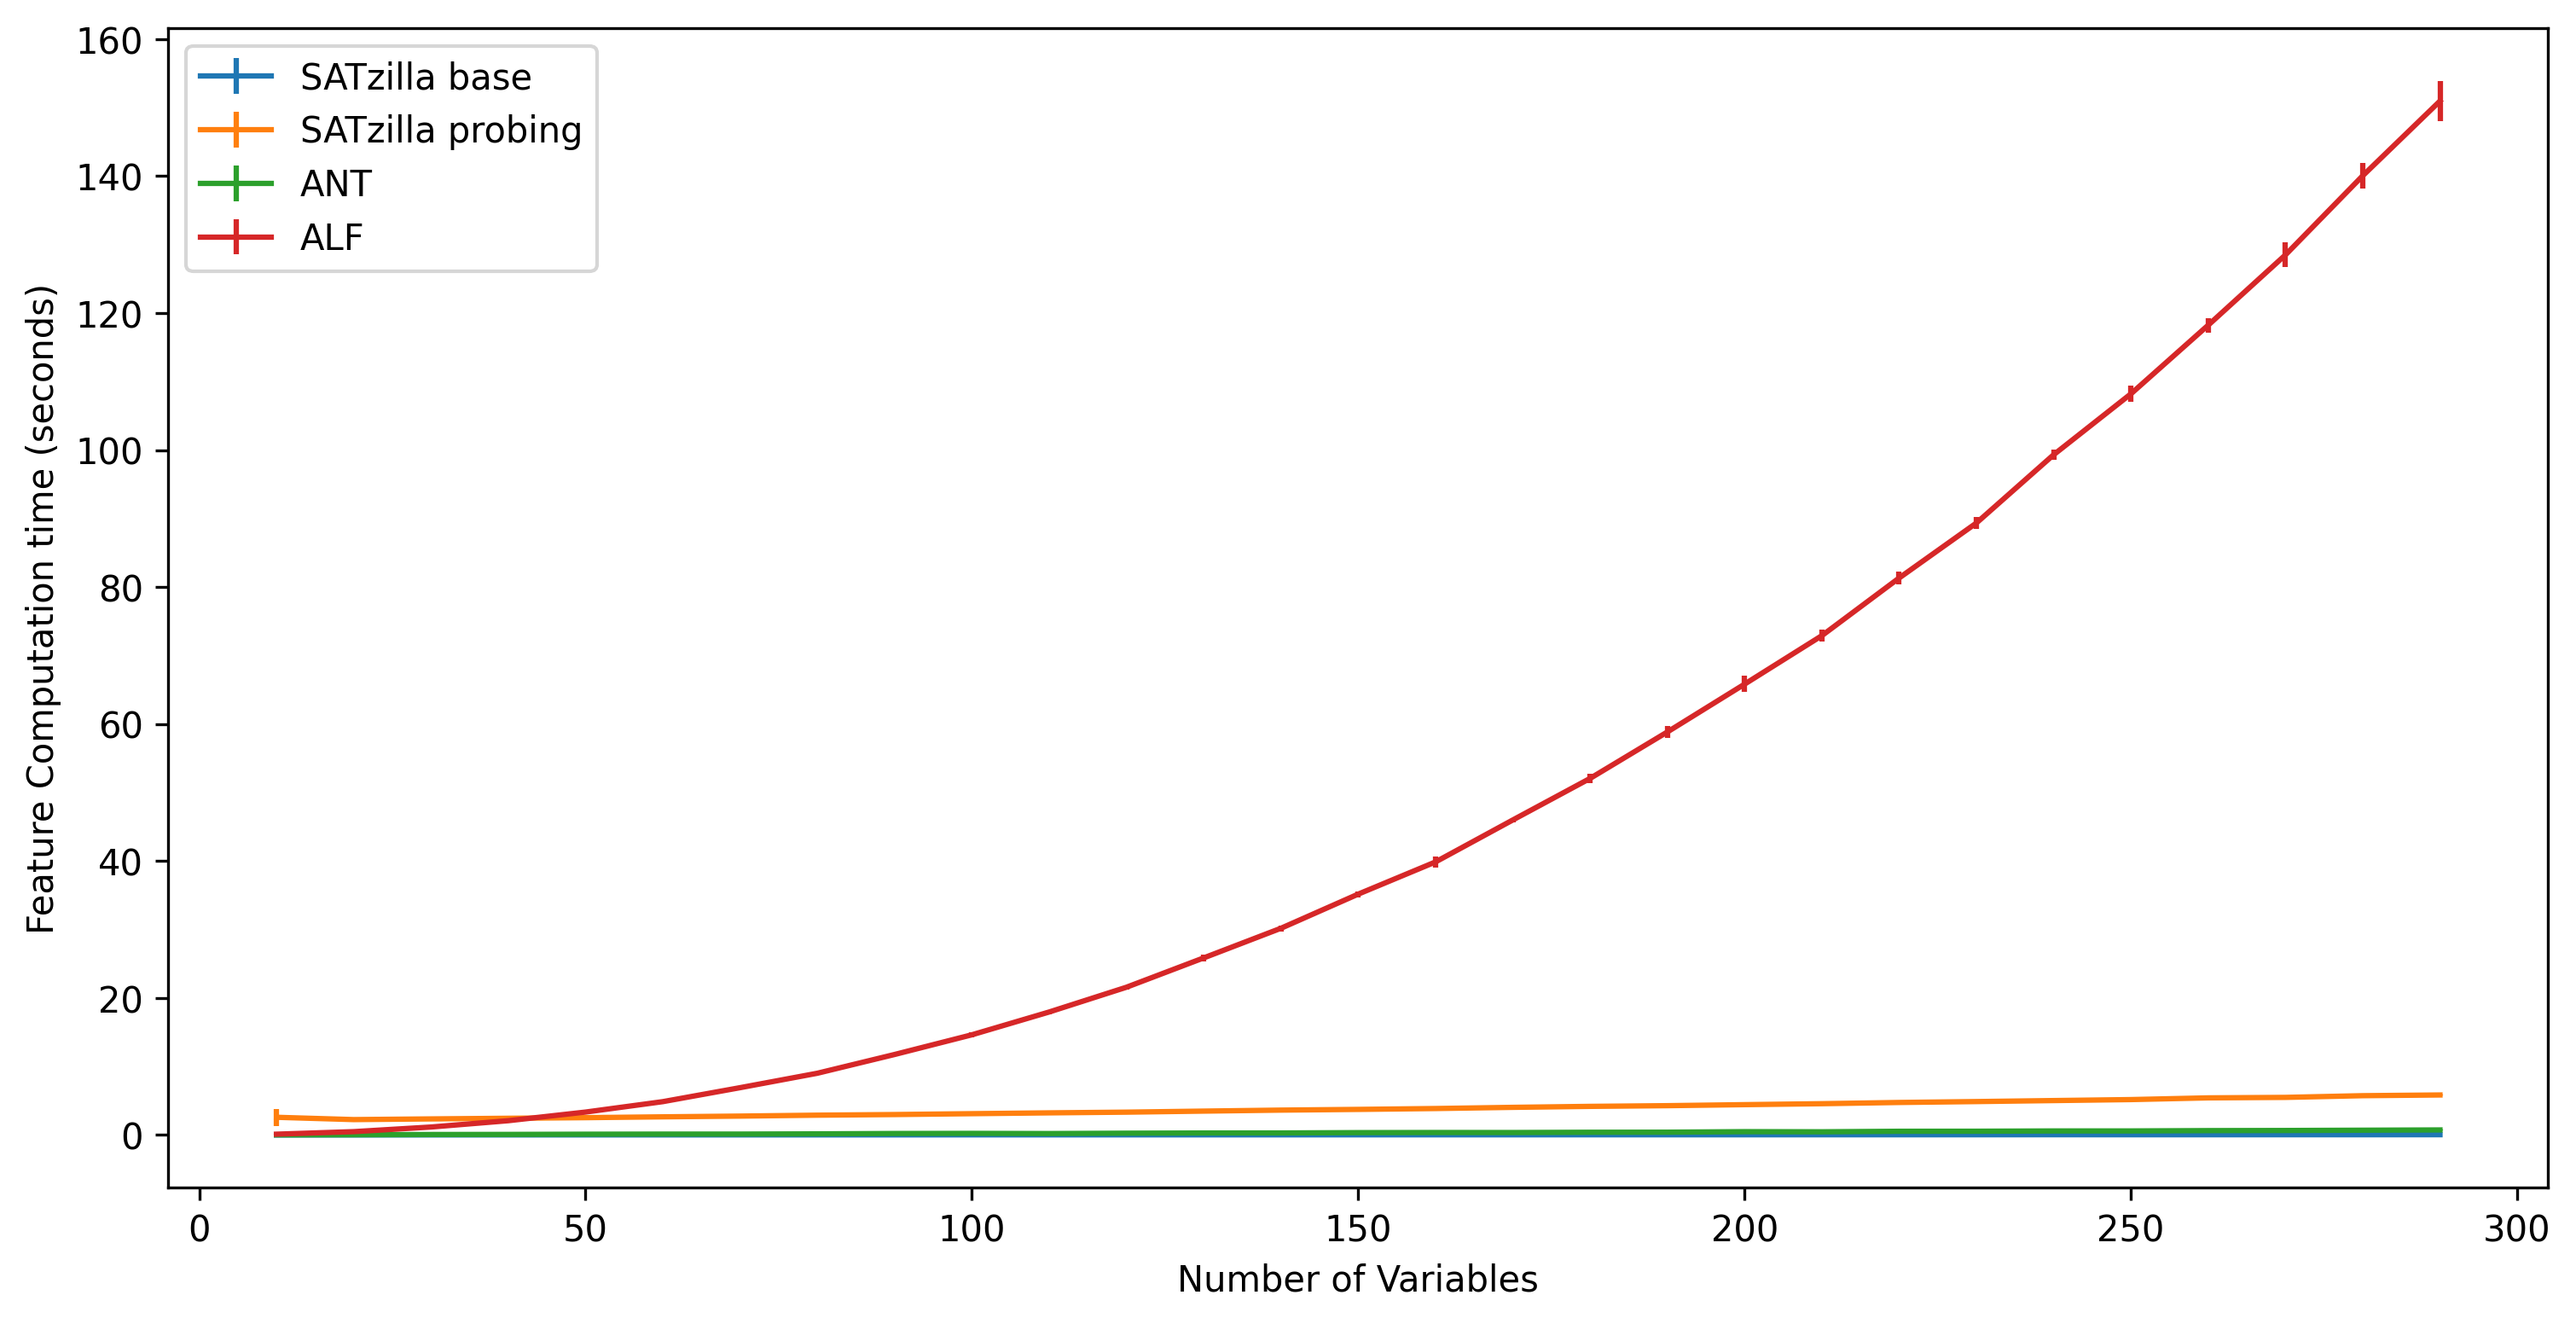

In [ ]:
timing = ['satzilla_base_t', 'satzilla_probe_t', 'ansotegui_t', 'alfonso_t']
timing_names = ["SATzilla base", "SATzilla probing", "ANT", "ALF"]


plt.figure(figsize = (12, 6), dpi = 300)
for i, time in enumerate(timing):
    Y = cnf_size.copy()
    X = df_rand[time]
    x,y,std = get_mean_std(X,Y)
    plt.errorbar(x, y, yerr=std, label=timing_names[i])
plt.legend(loc='upper left')

plt.xlabel("Number of Variables")
plt.ylabel("Feature Computation time (seconds)")
plt.savefig("time_v_size", bbox_inches="tight")
plt.show()